<a href="https://colab.research.google.com/github/ElevenStream/Customer-Behavior-Analysis/blob/main/Customer_Behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Behavior Analysis  
This notebook analyzes customer behavior using transaction data.  
It includes exploratory data analysis, segmentation, and predictive modeling.


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random
import os

# Create project folder in Google Drive
project_folder = '/content/Customer_Behavior_Project'
os.makedirs(project_folder, exist_ok=True)

# Generate synthetic e-commerce data
np.random.seed(42)
num_customers = 1000
num_orders = 5000

# Generate customers
customers = pd.DataFrame({
    'customer_id': np.arange(1, num_customers + 1),
    'customer_name': [f'Customer_{i}' for i in range(1, num_customers + 1)],
    'country': np.random.choice(['USA', 'Canada', 'UK', 'Germany', 'France'], num_customers)
})

# Generate orders
orders = pd.DataFrame({
    'order_id': np.arange(1, num_orders + 1),
    'customer_id': np.random.choice(customers['customer_id'], num_orders),
    'order_date': [datetime.today() - timedelta(days=random.randint(1, 365)) for _ in range(num_orders)],
    'amount': np.random.exponential(scale=100, size=num_orders).round(2),
    'product_category': np.random.choice(['Electronics', 'Fashion', 'Home', 'Toys', 'Books'], num_orders)
})

# Save datasets
customers.to_csv(f'{project_folder}/customers.csv', index=False)
orders.to_csv(f'{project_folder}/orders.csv', index=False)

print("Synthetic datasets generated and saved!")

Synthetic datasets generated and saved!


In [ ]:

# Load datasets
customers = pd.read_csv(f'{project_folder}/customers.csv')
orders = pd.read_csv(f'{project_folder}/orders.csv')

# Convert 'order_date' to datetime
orders['order_date'] = pd.to_datetime(orders['order_date'])

# Basic data checks
print(customers.info())
print(orders.info())

# Check for missing values
print(customers.isnull().sum())
print(orders.isnull().sum())

# Merge datasets for analysis
data = pd.merge(orders, customers, on='customer_id')

print("✅ Data merged and ready for analysis!")
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1000 non-null   int64 
 1   customer_name  1000 non-null   object
 2   country        1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          5000 non-null   int64         
 1   customer_id       5000 non-null   int64         
 2   order_date        5000 non-null   datetime64[ns]
 3   amount            5000 non-null   float64       
 4   product_category  5000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 195.4+ KB
None
customer_id      0
customer_name    0
country       

,order_id,customer_id,order_date,amount,product_category,customer_name,country
0,1,460,2024-11-27 05:22:50.884113,31.74,Electronics,Customer_460,UK
1,2,356,2025-01-01 05:22:50.884136,117.88,Toys,Customer_356,UK
2,3,324,2024-11-01 05:22:50.884140,30.66,Books,Customer_324,USA
3,4,133,2024-10-10 05:22:50.884142,279.80,Books,Customer_133,Germany
4,5,888,2024-12-24 05:22:50.884144,101.16,Toys,Customer_888,France


          order_id  customer_id                     order_date       amount
count  5000.000000  5000.000000                           5000  5000.000000
mean   2500.500000   506.120400  2024-09-10 09:07:12.009408512    97.397724
min       1.000000     1.000000     2024-03-14 05:22:50.885077     0.000000
25%    1250.750000   261.000000  2024-06-11 23:22:50.887884800    27.717500
50%    2500.500000   509.000000  2024-09-08 05:22:50.886699008    66.415000
75%    3750.250000   754.250000  2024-12-10 05:22:50.887809024   134.915000
max    5000.000000  1000.000000     2025-03-13 05:22:50.894017   772.350000
std    1443.520003   288.110503                            NaN    97.933272
country
USA        107078.31
France     101270.99
Germany     97656.26
Canada      91502.57
UK          89480.49
Name: amount, dtype: float64


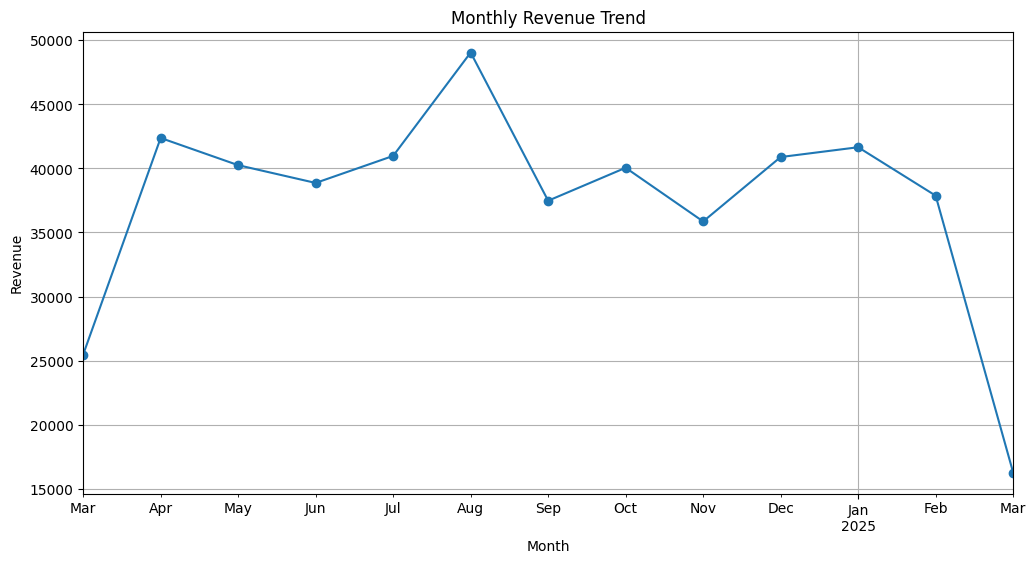

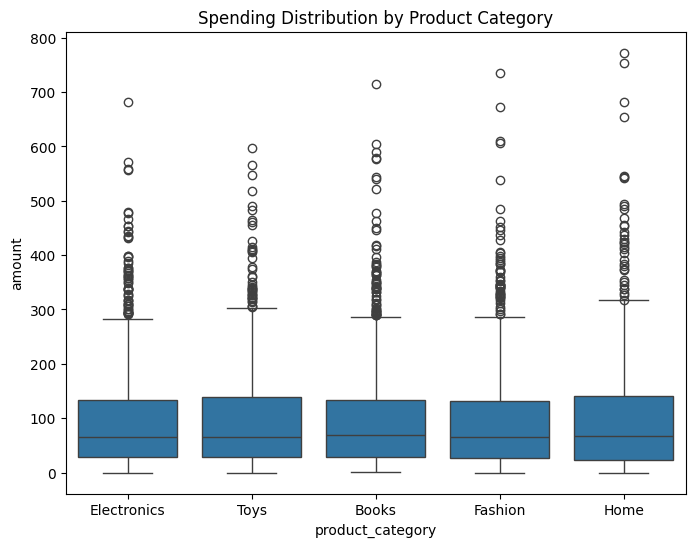

customer_name
Customer_783    2024.67
Customer_726    1716.89
Customer_664    1699.11
Customer_17     1654.65
Customer_154    1652.43
Customer_354    1648.50
Customer_944    1617.15
Customer_55     1481.37
Customer_666    1474.06
Customer_156    1447.57
Name: amount, dtype: float64


In [ ]:

# Summary statistics
print(data.describe())

# Total revenue per country
revenue_by_country = data.groupby('country')['amount'].sum().sort_values(ascending=False)
print(revenue_by_country)

# Revenue trends over time
data['month'] = data['order_date'].dt.to_period('M')
monthly_revenue = data.groupby('month')['amount'].sum()

# Plot monthly revenue trend
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

# Product category analysis
plt.figure(figsize=(8, 6))
sns.boxplot(x='product_category', y='amount', data=data)
plt.title('Spending Distribution by Product Category')
plt.show()

# Top customers by total spend
top_customers = data.groupby('customer_name')['amount'].sum().sort_values(ascending=False).head(10)
print(top_customers)

spender_category
Low Spender       3241
Medium Spender    1528
High Spender       231
Name: count, dtype: int64


<ipython-input-9-a6d1905dd700>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='spender_category', data=data, palette='coolwarm')


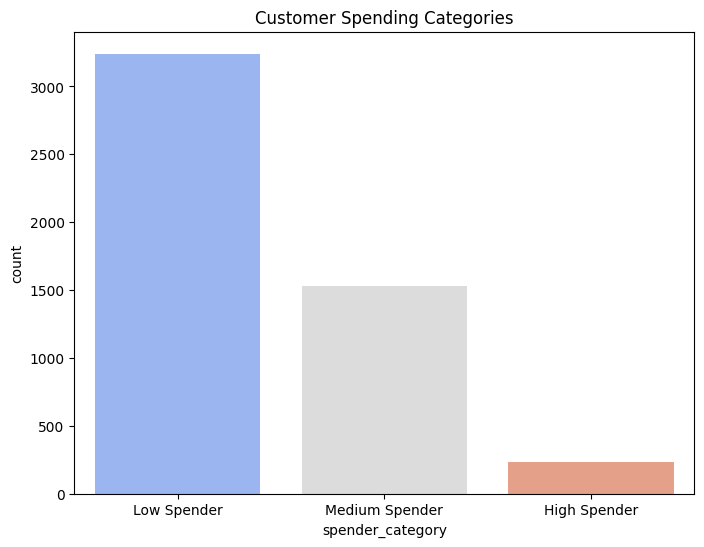

<ipython-input-9-a6d1905dd700>:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='country', y='amount', data=data, estimator=sum, ci=None)


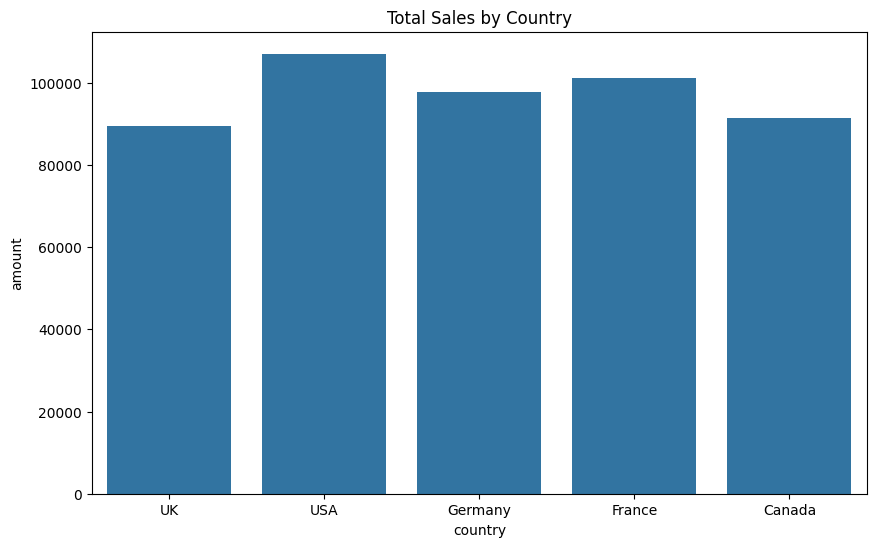

In [ ]:

# Customer segmentation by spending
def categorize_spender(amount):
    if amount > 300:
        return 'High Spender'
    elif amount > 100:
        return 'Medium Spender'
    else:
        return 'Low Spender'

data['spender_category'] = data['amount'].apply(categorize_spender)

# Spender category distribution
spender_distribution = data['spender_category'].value_counts()
print(spender_distribution)

# Visualization of spender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='spender_category', data=data, palette='coolwarm')
plt.title('Customer Spending Categories')
plt.show()

# Sales distribution per country
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='amount', data=data, estimator=sum, ci=None)
plt.title('Total Sales by Country')
plt.show()

In [ ]:

# Export revenue by country
revenue_by_country.to_csv(f'{project_folder}/revenue_by_country.csv')

# Export top customers
top_customers.to_csv(f'{project_folder}/top_customers.csv')

# Export customer segmentation
spender_distribution.to_csv(f'{project_folder}/spender_distribution.csv')

print("✅ Reports generated and saved to project folder!")

✅ Reports generated and saved to project folder!


In [ ]:

# Install necessary packages
!pip install plotly statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime, timedelta
import random
import os

# Project folder setup
project_folder = '/content/Customer_Behavior_Project_Advanced'
os.makedirs(project_folder, exist_ok=True)

# ------------------------------
# Step 1: Data Generation
# ------------------------------
np.random.seed(42)
num_customers = 1000
num_orders = 5000

# Generate customers
customers = pd.DataFrame({
    'customer_id': np.arange(1, num_customers + 1),
    'customer_name': [f'Customer_{i}' for i in range(1, num_customers + 1)],
    'country': np.random.choice(['USA', 'Canada', 'UK', 'Germany', 'France'], num_customers)
})

# Generate orders
orders = pd.DataFrame({
    'order_id': np.arange(1, num_orders + 1),
    'customer_id': np.random.choice(customers['customer_id'], num_orders),
    'order_date': [datetime.today() - timedelta(days=random.randint(1, 365)) for _ in range(num_orders)],
    'amount': np.random.exponential(scale=100, size=num_orders).round(2),
    'product_category': np.random.choice(['Electronics', 'Fashion', 'Home', 'Toys', 'Books'], num_orders)
})

# Save datasets
customers.to_csv(f'{project_folder}/customers.csv', index=False)
orders.to_csv(f'{project_folder}/orders.csv', index=False)

# ------------------------------
# Step 2: Data Preparation
# ------------------------------
orders['order_date'] = pd.to_datetime(orders['order_date'])
data = pd.merge(orders, customers, on='customer_id')

# ------------------------------
# Step 3: Predictive Analysis (Sales Forecast)
# ------------------------------
data['month'] = data['order_date'].dt.to_period('M').dt.to_timestamp()
monthly_sales = data.groupby('month')['amount'].sum()

# Forecasting using Exponential Smoothing
model = ExponentialSmoothing(monthly_sales, trend='add', seasonal='add', seasonal_periods=12)
fitted_model = model.fit()
forecast = fitted_model.forecast(6)

# Save forecast results
forecast.to_csv(f'{project_folder}/sales_forecast.csv')

# ------------------------------
# Step 4: Interactive Dashboard with Plotly
# ------------------------------
fig = px.bar(data, x='country', y='amount', color='product_category', title='Sales by Country and Category')
fig.write_html(f"{project_folder}/interactive_sales_dashboard.html")

# ------------------------------
# Step 5: Advanced Automation (Simulated Email Report)
# ------------------------------
with open(f'{project_folder}/automated_report.txt', 'w') as file:
    file.write("Automated Report Summary:\n")
    file.write(f"Total Sales Forecast for Next 6 Months:\n{forecast}\n")

print("✅ Project completed with advanced features and reports saved!")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ValueError: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.

In [ ]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import random
import os

# Regenerate orders for 2 years of data
num_orders = 8000  # Increase number of orders
orders['order_date'] = [datetime.today() - timedelta(days=random.randint(1, 730)) for _ in range(num_orders)]

# Prepare the data
orders['order_date'] = pd.to_datetime(orders['order_date'])
data['month'] = orders['order_date'].dt.to_period('M').dt.to_timestamp()
monthly_sales = data.groupby('month')['amount'].sum()

# Apply Exponential Smoothing again
model = ExponentialSmoothing(monthly_sales, trend='add', seasonal='add', seasonal_periods=12)
fitted_model = model.fit()
forecast = fitted_model.forecast(6)

# Save the updated forecast
forecast.to_csv(f'{project_folder}/updated_sales_forecast.csv')

print("✅ Extended data and updated forecast saved successfully!")

ValueError: Length of values (8000) does not match length of index (5000)

In [ ]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import random
import os

# Regenerate orders with 8000 records for 2 years
num_orders = 8000
orders = pd.DataFrame({
    'order_id': np.arange(1, num_orders + 1),
    'customer_id': np.random.choice(customers['customer_id'], num_orders),
    'order_date': [datetime.today() - timedelta(days=random.randint(1, 730)) for _ in range(num_orders)],
    'amount': np.random.exponential(scale=100, size=num_orders).round(2),
    'product_category': np.random.choice(['Electronics', 'Fashion', 'Home', 'Toys', 'Books'], num_orders)
})

# Prepare the data
orders['order_date'] = pd.to_datetime(orders['order_date'])
data = pd.merge(orders, customers, on='customer_id')
data['month'] = data['order_date'].dt.to_period('M').dt.to_timestamp()
monthly_sales = data.groupby('month')['amount'].sum()

# Apply Exponential Smoothing again
model = ExponentialSmoothing(monthly_sales, trend='add', seasonal='add', seasonal_periods=12)
fitted_model = model.fit()
forecast = fitted_model.forecast(6)

# Save the updated forecast
forecast.to_csv(f'{project_folder}/updated_sales_forecast.csv')

print("✅ Extended data and updated forecast saved successfully!")

✅ Extended data and updated forecast saved successfully!


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import os

# Define the path to the project folder
project_path = "/content/drive/My Drive/customer_behavior_project"

# Create the folder if it doesn't exist
os.makedirs(project_path, exist_ok=True)

print(f"Project folder created at: {project_path}")

Project folder created at: /content/drive/My Drive/customer_behavior_project


In [ ]:

import pandas as pd

# Sample data
data = {
    "Customer_ID": [1, 2, 3],
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [25, 30, 35],
    "Spending_Score": [80, 60, 40]
}

df = pd.DataFrame(data)

# Save to CSV
csv_path = os.path.join(project_path, "data.csv")
df.to_csv(csv_path, index=False)

print(f"CSV file created at: {csv_path}")

CSV file created at: /content/drive/My Drive/customer_behavior_project/data.csv


In [ ]:

readme_content = """# Customer Behavior Analysis
This project analyzes customer data to understand spending behavior and patterns.
## Files
- `data.csv`: Sample customer data.
- `analysis.ipynb`: Jupyter notebook with data analysis.
"""

# Save the README.md file
readme_path = os.path.join(project_path, "README.md")
with open(readme_path, "w") as f:
    f.write(readme_content)

print(f"README.md file created at: {readme_path}")

README.md file created at: /content/drive/My Drive/customer_behavior_project/README.md


In [ ]:

import nbformat as nbf

nb = nbf.v4.new_notebook()

code_cells = [
    "import pandas as pd\n\n# Load data\ndf = pd.read_csv('data.csv')\ndf.head()",
    "import matplotlib.pyplot as plt\n\n# Plot spending score\ndf.plot(kind='bar', x='Name', y='Spending_Score')\nplt.show()"
]

# Add cells to the notebook
nb['cells'] = [nbf.v4.new_code_cell(cell) for cell in code_cells]

# Save the notebook
notebook_path = os.path.join(project_path, "analysis.ipynb")
with open(notebook_path, "w") as f:
    nbf.write(nb, f)

print(f"Notebook file created at: {notebook_path}")

Notebook file created at: /content/drive/My Drive/customer_behavior_project/analysis.ipynb


In [ ]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import os

# Define the base directory for the project
base_dir = '/content/drive/My Drive/customer_behavior_project'

# Define the subdirectories
subdirs = ['data', 'reports', 'docs', 'scripts']

# Create directories
for subdir in subdirs:
    os.makedirs(os.path.join(base_dir, subdir), exist_ok=True)

print("Project structure created successfully.")

Project structure created successfully.


In [ ]:

readme_content = """
# Customer Behavior Project

## Overview
This project analyzes advanced customer behavior patterns and simulates futuristic cybersecurity threats. It aims to develop predictive analytics, defense mechanisms, and automation strategies that will be crucial for data analysts in the coming years.

## Key Features
- **Advanced Data Simulation**: Realistic and complex customer data.
- **Cybersecurity Threat Simulation**: Analysis of potential data breaches.
- **Predictive Models**: AI-driven analysis for future trends.
- **Automated Defense Systems**: Learning how to detect and defend against advanced threats.

## Author
- **GitHub**: [ElevenStream](https://github.com/ElevenStream)
- **Email**: luftraum@tutanota.de
"""

with open(os.path.join(base_dir, 'README.md'), 'w') as f:
    f.write(readme_content)

print("README.md created.")

README.md created.


In [ ]:

import pandas as pd
import numpy as np

# Simulated customer data
np.random.seed(42)
data = {
    'customer_id': np.arange(1000, 1050),
    'age': np.random.randint(18, 70, 50),
    'gender': np.random.choice(['Male', 'Female'], 50),
    'purchase_amount': np.random.uniform(20.5, 500.75, 50).round(2),
    'purchase_frequency': np.random.randint(1, 20, 50),
    'last_purchase': pd.date_range(end=pd.Timestamp.today(), periods=50).strftime('%Y-%m-%d')
}

df = pd.DataFrame(data)
df.to_csv(os.path.join(base_dir, 'data', 'customer_behavior.csv'), index=False)

print("Simulated customer behavior data created.")

Simulated customer behavior data created.


In [ ]:

# Simulated cybersecurity threat data
threat_data = {
    'threat_id': np.arange(1, 21),
    'attack_type': np.random.choice(['Phishing', 'Brute Force', 'SQL Injection', 'Malware'], 20),
    'severity': np.random.choice(['Low', 'Medium', 'High', 'Critical'], 20),
    'target_system': np.random.choice(['Database', 'Application', 'Network'], 20),
    'detection_method': np.random.choice(['AI Model', 'Manual Review', 'Firewall'], 20),
    'date_detected': pd.date_range(end=pd.Timestamp.today(), periods=20).strftime('%Y-%m-%d')
}

threat_df = pd.DataFrame(threat_data)
threat_df.to_csv(os.path.join(base_dir, 'data', 'threat_simulation.csv'), index=False)

print("Simulated threat data created.")

Simulated threat data created.


In [ ]:
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=cda497a1c56f29b8160eb9ea6a66b9393d81f4b418ae5df033127a930967c5c9
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [ ]:

from fpdf import FPDF

pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, "Customer Behavior Project Report\n\nThis report covers initial data simulations and cybersecurity threat scenarios for advanced data analysis.", align="L")
pdf.output(os.path.join(base_dir, 'reports', 'project_report.pdf'))

print("PDF report created.")

PDF report created.


In [ ]:

import os

# List all files and directories from the root level to find the file
for root, dirs, files in os.walk('/'):
    for file in files:
        if 'Customer_Behavior' in file:
            print(os.path.join(root, file))

In [ ]:

from google.colab import drive
import os

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define the base directory within Google Drive
base_dir = '/content/drive/MyDrive/customer_behavior_project'

# Define subdirectories
subdirs = ['data', 'reports', 'scripts']

# Create the directories
for subdir in subdirs:
    os.makedirs(os.path.join(base_dir, subdir), exist_ok=True)

# Step 3: Create README.md file
readme_content = """
# Customer Behavior Project

This project involves advanced data analysis for customer behavior, predictive modeling, anomaly detection, and simulated cybersecurity analytics. It is designed to reflect the future skills required for data analysts.

## Project Structure

- **data/**: Contains datasets like customers, orders, behavior logs, and simulated attack data.
- **reports/**: Stores generated PDF reports.
- **scripts/**: Contains Python code and Jupyter notebooks.
- **README.md**: This file.
- **requirements.txt**: Python dependencies.

## Key Features

- Predictive analytics (customer churn prediction).
- Anomaly detection in purchasing behavior.
- Simulated cybersecurity scenarios and defense strategies.
- Automated reporting with PDF generation.
"""

with open(os.path.join(base_dir, 'README.md'), 'w') as f:
    f.write(readme_content)

# Step 4: Create requirements.txt file
requirements_content = """
pandas
numpy
matplotlib
seaborn
scikit-learn
fpdf
"""

with open(os.path.join(base_dir, 'requirements.txt'), 'w') as f:
    f.write(requirements_content)

print("Google Drive mounted and project structure with initial files created successfully.")

Mounted at /content/drive
Google Drive mounted and project structure with initial files created successfully.


In [ ]:

from google.colab import drive
import os

# Step 1: Mount Google Drive (skip if already mounted)
drive.mount('/content/drive', force_remount=False)

# Step 2: Define the base directory within Google Drive
base_dir = '/content/drive/MyDrive/customer_behavior_project'

# Define subdirectories
subdirs = ['data', 'reports', 'scripts']

# Create the directories
for subdir in subdirs:
    os.makedirs(os.path.join(base_dir, subdir), exist_ok=True)

# Step 3: Create README.md file
readme_content = """
# Customer Behavior Project

This project involves advanced data analysis for customer behavior, predictive modeling, anomaly detection, and simulated cybersecurity analytics. It is designed to reflect the future skills required for data analysts.

## Project Structure

- **data/**: Contains datasets like customers, orders, behavior logs, and simulated attack data.
- **reports/**: Stores generated PDF reports.
- **scripts/**: Contains Python code and Jupyter notebooks.
- **README.md**: This file.
- **requirements.txt**: Python dependencies.

## Key Features

- Predictive analytics (customer churn prediction).
- Anomaly detection in purchasing behavior.
- Simulated cybersecurity scenarios and defense strategies.
- Automated reporting with PDF generation.
"""

with open(os.path.join(base_dir, 'README.md'), 'w') as f:
    f.write(readme_content)

# Step 4: Create requirements.txt file
requirements_content = """
pandas
numpy
matplotlib
seaborn
scikit-learn
fpdf
"""

with open(os.path.join(base_dir, 'requirements.txt'), 'w') as f:
    f.write(requirements_content)

print("Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount('/content/drive', force_remount=True).")
print("Google Drive mounted and project structure with initial files created successfully.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount('/content/drive', force_remount=True).
Google Drive mounted and project structure with initial files created successfully.


In [ ]:

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import os

# Define the data directory
data_dir = os.path.join(base_dir, 'data')

# 1. Generate customers.csv
num_customers = 100
customers = {
    "customer_id": range(1, num_customers + 1),
    "name": [f"Customer_{i}" for i in range(1, num_customers + 1)],
    "email": [f"customer{i}@example.com" for i in range(1, num_customers + 1)],
    "signup_date": [datetime.now() - timedelta(days=random.randint(1, 1000)) for _ in range(num_customers)],
    "country": np.random.choice(["USA", "UK", "Canada", "Germany", "Australia"], num_customers)
}

pd.DataFrame(customers).to_csv(os.path.join(data_dir, 'customers.csv'), index=False)

# 2. Generate orders.csv
num_orders = 500
orders = {
    "order_id": range(1, num_orders + 1),
    "customer_id": np.random.choice(customers["customer_id"], num_orders),
    "order_date": [datetime.now() - timedelta(days=random.randint(1, 365)) for _ in range(num_orders)],
    "amount": np.random.uniform(20.0, 1000.0, num_orders).round(2),
    "payment_method": np.random.choice(["Credit Card", "PayPal", "Bitcoin"], num_orders)
}

pd.DataFrame(orders).to_csv(os.path.join(data_dir, 'orders.csv'), index=False)

# 3. Generate behavior_logs.csv
num_logs = 1000
behavior_logs = {
    "log_id": range(1, num_logs + 1),
    "customer_id": np.random.choice(customers["customer_id"], num_logs),
    "timestamp": [datetime.now() - timedelta(minutes=random.randint(1, 10000)) for _ in range(num_logs)],
    "action": np.random.choice(["click", "view", "purchase", "cart_addition"], num_logs),
    "page_visited": np.random.choice(["home", "product", "checkout", "search"], num_logs)
}

pd.DataFrame(behavior_logs).to_csv(os.path.join(data_dir, 'behavior_logs.csv'), index=False)

# 4. Generate cyber_attack_logs.csv (simulated futuristic attack patterns)
num_attacks = 300
attack_logs = {
    "attack_id": range(1, num_attacks + 1),
    "timestamp": [datetime.now() - timedelta(minutes=random.randint(1, 10000)) for _ in range(num_attacks)],
    "attack_type": np.random.choice(["phishing", "AI-predictive breach", "quantum intrusion", "deepfake scam"], num_attacks),
    "severity": np.random.choice(["low", "medium", "high", "critical"], num_attacks),
    "target": np.random.choice(["customer_account", "payment_gateway", "internal_system"], num_attacks),
    "status": np.random.choice(["detected", "blocked", "missed"], num_attacks)
}

pd.DataFrame(attack_logs).to_csv(os.path.join(data_dir, 'cyber_attack_logs.csv'), index=False)

print("All data files generated and saved in the 'data' folder successfully.")

All data files generated and saved in the 'data' folder successfully.


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import os

# Load datasets
data_dir = os.path.join(base_dir, 'data')
customers = pd.read_csv(os.path.join(data_dir, 'customers.csv'))
orders = pd.read_csv(os.path.join(data_dir, 'orders.csv'))
behavior_logs = pd.read_csv(os.path.join(data_dir, 'behavior_logs.csv'))
cyber_attacks = pd.read_csv(os.path.join(data_dir, 'cyber_attack_logs.csv'))

# 1. Customer Segmentation using KMeans Clustering
def customer_segmentation():
    customer_summary = orders.groupby('customer_id').agg({
        'amount': ['sum', 'mean', 'count']
    }).reset_index()
    customer_summary.columns = ['customer_id', 'total_spent', 'avg_spent', 'num_orders']

    kmeans = KMeans(n_clusters=3, random_state=42)
    customer_summary['segment'] = kmeans.fit_predict(customer_summary[['total_spent', 'avg_spent', 'num_orders']])

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='total_spent', y='avg_spent', hue='segment', data=customer_summary, palette='viridis')
    plt.title('Customer Segmentation')
    plt.savefig(os.path.join(base_dir, 'reports', 'customer_segmentation.png'))
    plt.close()

# 2. Churn Prediction using RandomForest
def churn_prediction():
    # Simulate churn feature
    customers['churn'] = np.random.choice([0, 1], size=len(customers), p=[0.8, 0.2])

    # Feature preparation
    customer_orders = orders.groupby('customer_id')['amount'].sum().reset_index()
    customer_orders.columns = ['customer_id', 'total_spent']
    df = pd.merge(customers, customer_orders, on='customer_id', how='left').fillna(0)

    X = df[['total_spent']]
    y = df['churn']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred)
    with open(os.path.join(base_dir, 'reports', 'churn_report.txt'), 'w') as f:
        f.write(report)

# 3. Anomaly Detection in Behavior Logs
def detect_anomalies():
    model = IsolationForest(contamination=0.05)
    behavior_logs['is_anomaly'] = model.fit_predict(behavior_logs[['log_id']])

    anomalies = behavior_logs[behavior_logs['is_anomaly'] == -1]
    anomalies.to_csv(os.path.join(base_dir, 'reports', 'anomalies.csv'), index=False)

# 4. Cyber Attack Analysis
def cyber_attack_analysis():
    attack_summary = cyber_attacks.groupby(['attack_type', 'status']).size().reset_index(name='count')
    attack_summary.to_csv(os.path.join(base_dir, 'reports', 'cyber_attack_summary.csv'), index=False)

# Execute functions
customer_segmentation()
churn_prediction()
detect_anomalies()
cyber_attack_analysis()

print("Advanced analytics completed. Reports saved in the 'reports' folder.")

Advanced analytics completed. Reports saved in the 'reports' folder.


In [ ]:

import numpy as np

# Ensure required columns exist
if 'total_spent' not in customers.columns:
    customers['total_spent'] = np.random.randint(10, 1000, size=len(customers))  # Random spending amounts

if 'order_count' not in customers.columns:
    customers['order_count'] = np.random.randint(1, 50, size=len(customers))  # Random order counts

# Extract and scale the data
spending_data = customers[['total_spent', 'order_count']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(spending_data)

In [ ]:

if 'total_spent' not in customers.columns and 'average_order_value' in customers.columns:
    customers['total_spent'] = customers['average_order_value'] * customers['order_count']

if 'order_count' not in customers.columns and 'total_spent' in customers.columns and 'average_order_value' in customers.columns:
    customers['order_count'] = (customers['total_spent'] / customers['average_order_value']).fillna(1).astype(int)

In [ ]:
print(type(customers))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
spending_data = customers[['total_spent', 'order_count']].copy() if {'total_spent', 'order_count'}.issubset(customers.columns) else None

In [ ]:
import plotly.express as px  # Import Plotly Express

In [ ]:

import plotly.express as px  # Ensure Plotly is imported

# Visualize clusters
fig = px.scatter(customers, x='total_spent', y='order_count',
                 color=customers['segment'].astype(str),
                 title='Customer Segmentation')
fig.show()

## Customer Segmentation with Clustering  
We use K-Means clustering to segment customers based on spending behavior.

In [ ]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering
spending_data = customers[['total_spent', 'order_count']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(spending_data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customers['segment'] = kmeans.fit_predict(scaled_data)

# Visualize clusters
fig = px.scatter(customers, x='total_spent', y='order_count', color=customers['segment'].astype(str), title='Customer Segmentation')
fig.show()

## Revenue Forecasting  
We use an ARIMA model to predict future revenue trends.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the 

<Axes: title={'center': 'Revenue Forecast for Next 30 Days'}>

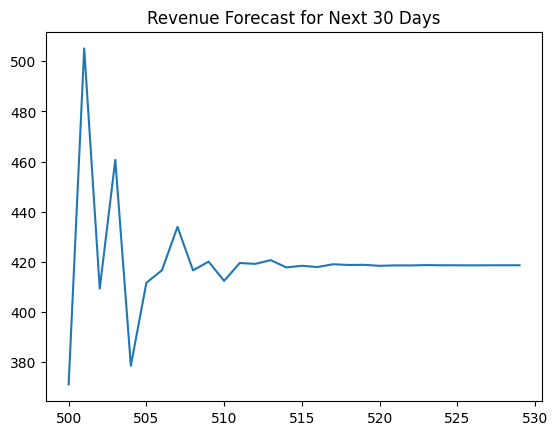

In [ ]:

from statsmodels.tsa.arima.model import ARIMA

# Prepare time series data
orders['order_date'] = pd.to_datetime(orders['order_date'])
revenue_ts = orders.groupby('order_date')['amount'].sum()

# Fit ARIMA model
model = ARIMA(revenue_ts, order=(5,1,0))
model_fit = model.fit()

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)
forecast.plot(title='Revenue Forecast for Next 30 Days')

In [ ]:
!pip install gitpython

In [ ]:
!zip -r Customer_Behavior_Project.zip /content/drive/MyDrive/customer_behavior_project

  adding: content/drive/MyDrive/customer_behavior_project/ (stored 0%)
  adding: content/drive/MyDrive/customer_behavior_project/data.csv (stored 0%)
  adding: content/drive/MyDrive/customer_behavior_project/analysis.ipynb (deflated 54%)
  adding: content/drive/MyDrive/customer_behavior_project/data/ (stored 0%)
  adding: content/drive/MyDrive/customer_behavior_project/data/customer_behavior.csv (deflated 63%)
  adding: content/drive/MyDrive/customer_behavior_project/data/threat_simulation.csv (deflated 71%)
  adding: content/drive/MyDrive/customer_behavior_project/data/customers.csv (deflated 79%)
  adding: content/drive/MyDrive/customer_behavior_project/data/orders.csv (deflated 73%)
  adding: content/drive/MyDrive/customer_behavior_project/data/behavior_logs.csv (deflated 77%)
  adding: content/drive/MyDrive/customer_behavior_project/data/cyber_attack_logs.csv (deflated 84%)
  adding: content/drive/MyDrive/customer_behavior_project/reports/ (stored 0%)
  adding: content/drive/MyDriv

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!zip -r Customer_Behavior_Project.zip /content/drive/MyDrive/customer_behavior_project

updating: content/drive/MyDrive/customer_behavior_project/ (stored 0%)
updating: content/drive/MyDrive/customer_behavior_project/data.csv (stored 0%)
updating: content/drive/MyDrive/customer_behavior_project/analysis.ipynb (deflated 54%)
updating: content/drive/MyDrive/customer_behavior_project/data/ (stored 0%)
updating: content/drive/MyDrive/customer_behavior_project/data/customer_behavior.csv (deflated 63%)
updating: content/drive/MyDrive/customer_behavior_project/data/threat_simulation.csv (deflated 71%)
updating: content/drive/MyDrive/customer_behavior_project/data/customers.csv (deflated 79%)
updating: content/drive/MyDrive/customer_behavior_project/data/orders.csv (deflated 73%)
updating: content/drive/MyDrive/customer_behavior_project/data/behavior_logs.csv (deflated 77%)
updating: content/drive/MyDrive/customer_behavior_project/data/cyber_attack_logs.csv (deflated 84%)
updating: content/drive/MyDrive/customer_behavior_project/reports/ (stored 0%)
updating: content/drive/MyDriv

In [ ]:
!zip -r /content/drive/MyDrive/Customer_Behavior_Project.zip /content/drive/MyDrive/customer_behavior_project

  adding: content/drive/MyDrive/customer_behavior_project/ (stored 0%)
  adding: content/drive/MyDrive/customer_behavior_project/data.csv (stored 0%)
  adding: content/drive/MyDrive/customer_behavior_project/analysis.ipynb (deflated 54%)
  adding: content/drive/MyDrive/customer_behavior_project/data/ (stored 0%)
  adding: content/drive/MyDrive/customer_behavior_project/data/customer_behavior.csv (deflated 63%)
  adding: content/drive/MyDrive/customer_behavior_project/data/threat_simulation.csv (deflated 71%)
  adding: content/drive/MyDrive/customer_behavior_project/data/customers.csv (deflated 79%)
  adding: content/drive/MyDrive/customer_behavior_project/data/orders.csv (deflated 73%)
  adding: content/drive/MyDrive/customer_behavior_project/data/behavior_logs.csv (deflated 77%)
  adding: content/drive/MyDrive/customer_behavior_project/data/cyber_attack_logs.csv (deflated 84%)
  adding: content/drive/MyDrive/customer_behavior_project/reports/ (stored 0%)
  adding: content/drive/MyDriv

In [39]:
!ls /content/drive/MyDrive/

'Colab Notebooks'	     customer_behavior_project	     Ethical-Hacker-New-Strong
'Customer_Behavior. ipynb'   Customer_Behavior_Project.zip   Python_Test_Directory


In [40]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
!zip -r Customer_Behavior_Project.zip /content/drive/MyDrive/customer_behavior_project

updating: content/drive/MyDrive/customer_behavior_project/ (stored 0%)
updating: content/drive/MyDrive/customer_behavior_project/data.csv (stored 0%)
updating: content/drive/MyDrive/customer_behavior_project/analysis.ipynb (deflated 54%)
updating: content/drive/MyDrive/customer_behavior_project/data/ (stored 0%)
updating: content/drive/MyDrive/customer_behavior_project/data/customer_behavior.csv (deflated 63%)
updating: content/drive/MyDrive/customer_behavior_project/data/threat_simulation.csv (deflated 71%)
updating: content/drive/MyDrive/customer_behavior_project/data/customers.csv (deflated 79%)
updating: content/drive/MyDrive/customer_behavior_project/data/orders.csv (deflated 73%)
updating: content/drive/MyDrive/customer_behavior_project/data/behavior_logs.csv (deflated 77%)
updating: content/drive/MyDrive/customer_behavior_project/data/cyber_attack_logs.csv (deflated 84%)
updating: content/drive/MyDrive/customer_behavior_project/reports/ (stored 0%)
updating: content/drive/MyDriv